In [63]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
communities_and_crime = fetch_ucirepo(id=183) 
  
# data (as pandas dataframes) 
X = communities_and_crime.data.features 
y = communities_and_crime.data.targets 

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pdfplumber
import csv
import re

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [65]:
X.head(15)

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.00,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,0.41,0.25,0.52,0.68,0.40,0.75,0.75,0.35,0.55,0.59,0.61,0.56,0.74,0.76,0.04,0.14,0.03,0.24,0.27,0.37,0.39,0.07,0.07,0.08,0.08,0.89,0.06,0.14,0.13,0.33,0.39,0.28,0.55,0.09,0.51,0.5,0.21,0.71,0.52,0.05,0.26,0.65,0.14,0.06,0.22,0.19,0.18,0.36,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.00,0.12,0.42,0.50,0.51,0.64,0.03,0.13,0.96,0.17,0.06,0.18,0.44,0.13,0.94,0.93,0.03,0.07,0.1,0.07,0.02,0.57,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.00,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,0.42,0.36,1.00,0.63,0.91,1.00,0.29,0.43,0.47,0.60,0.39,0.46,0.53,0.00,0.24,0.01,0.52,0.62,0.64,0.63,0.25,0.27,0.25,0.23,0.84,0.10,0.16,0.10,0.17,0.29,0.17,0.26,0.20,0.82,0.0,0.02,0.79,0.24,0.02,0.25,0.65,0.16,0.00,0.21,0.20,0.21,0.42,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.00,0.21,0.50,0.34,0.60,0.52,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.02,0.12,0.45,?,?,?,?,0.00,?
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.00,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,0.49,0.32,0.63,0.41,0.71,0.70,0.45,0.42,0.44,0.43,0.43,0.71,0.67,0.01,0.46,0.00,0.07,0.06,0.15,0.19,0.02,0.02,0.04,0.05,0.88,0.04,0.20,0.20,0.46,0.52,0.43,0.42,0.15,0.51,0.5,0.01,0.86,0.41,0.29,0.30,0.52,0.47,0.45,0.18,0.17,0.16,0.27,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.00,0.14,0.49,0.54,0.67,0.56,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.01,0.21,0.02,?,?,?,?,0.00,?
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.00,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,0.45,0.37,0.39,0.34,0.45,0.49,0.44,0.75,0.65,0.54,0.83,0.65,0.85,0.86,0.03,0.33,0.02,0.11,0.20,0.30,0.31,0.05,0.08,0.11,0.11,0.81,0.08,0.56,0.62,0.85,0.77,1.00,0.94,0.12,0.01,0.5,0.01,0.97,0.96,0.60,0.47,0.52,0.11,0.11,0.24,0.21,0.19,0.75,0.70,0.77,0.89,0.63,0.51,0.47,0.00,0.00,0.19,0.30,0.73,0.64,0

In [66]:
y.head()

,ViolentCrimesPerPop
0,0.20
1,0.67
2,0.43
3,0.12
4,0.03


In [67]:
# combine x and y datasets in order to evaluate complete dataset and remove entries if needed
df = X
df['ViolentCrimesPerPop'] = y
df.shape

(1994, 128)

In [68]:
df.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,0.41,0.25,0.52,0.68,0.40,0.75,0.75,0.35,0.55,0.59,0.61,0.56,0.74,0.76,0.04,0.14,0.03,0.24,0.27,0.37,0.39,0.07,0.07,0.08,0.08,0.89,0.06,0.14,0.13,0.33,0.39,0.28,0.55,0.09,0.51,0.5,0.21,0.71,0.52,0.05,0.26,0.65,0.14,0.06,0.22,0.19,0.18,0.36,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.03,0.13,0.96,0.17,0.06,0.18,0.44,0.13,0.94,0.93,0.03,0.07,0.1,0.07,0.02,0.57,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,0.42,0.36,1.00,0.63,0.91,1.00,0.29,0.43,0.47,0.60,0.39,0.46,0.53,0.00,0.24,0.01,0.52,0.62,0.64,0.63,0.25,0.27,0.25,0.23,0.84,0.10,0.16,0.10,0.17,0.29,0.17,0.26,0.20,0.82,0.0,0.02,0.79,0.24,0.02,0.25,0.65,0.16,0.00,0.21,0.20,0.21,0.42,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.0,0.21,0.50,0.34,0.60,0.52,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,0.49,0.32,0.63,0.41,0.71,0.70,0.45,0.42,0.44,0.43,0.43,0.71,0.67,0.01,0.46,0.00,0.07,0.06,0.15,0.19,0.02,0.02,0.04,0.05,0.88,0.04,0.20,0.20,0.46,0.52,0.43,0.42,0.15,0.51,0.5,0.01,0.86,0.41,0.29,0.30,0.52,0.47,0.45,0.18,0.17,0.16,0.27,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.0,0.14,0.49,0.54,0.67,0.56,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,0.45,0.37,0.39,0.34,0.45,0.49,0.44,0.75,0.65,0.54,0.83,0.65,0.85,0.86,0.03,0.33,0.02,0.11,0.20,0.30,0.31,0.05,0.08,0.11,0.11,0.81,0.08,0.56,0.62,0.85,0.77,1.00,0.94,0.12,0.01,0.5,0.01,0.97,0.96,0.60,0.47,0.52,0.11,0.11,0.24,0.21,0.19,0.75,0.70,0.77,0.89,0.63,0.51,0.47,0.0

In [69]:
df = df.replace('?', np.nan)

In [70]:
# null value counts per variable
df_nulls = df.isna().sum().to_string()
print(df_nulls)

state                       0
county                   1174
community                1177
communityname               0
fold                        0
population                  0
householdsize               0
racepctblack                0
racePctWhite                0
racePctAsian                0
racePctHisp                 0
agePct12t21                 0
agePct12t29                 0
agePct16t24                 0
agePct65up                  0
numbUrban                   0
pctUrban                    0
medIncome                   0
pctWWage                    0
pctWFarmSelf                0
pctWInvInc                  0
pctWSocSec                  0
pctWPubAsst                 0
pctWRetire                  0
medFamInc                   0
perCapInc                   0
whitePerCap                 0
blackPerCap                 0
indianPerCap                0
AsianPerCap                 0
OtherPerCap                 1
HispPerCap                  0
NumUnderPov                 0
PctPopUnde

In [71]:
# summary statistics
df.describe()

,state,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,28.683551,5.493982,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,0.336264,0.423164,0.064072,0.696269,0.361123,0.558154,0.291570,0.495687,0.471133,0.317778,0.479248,0.375677,0.350251,0.368049,0.291098,0.203506,0.322357,0.386279,0.055507,0.303024,0.315807,0.383330,0.361675,0.363531,0.501073,0.396384,0.440597,0.391224,0.441339,0.461244,0.434453,0.487568,0.494273,0.487748,0.610918,0.620657,0.664032,0.582884,0.501449,0.526690,0.036294,0.249995,0.030060,0.320211,0.360622,0.399077,0.427879,0.181364,0.182126,0.184774,0.182879,0.785903,0.150587,0.267608,0.251891,0.462101,0.494428,0.404097,0.562598,0.186264,0.495186,0.314694,0.076815,0.719549,0.548686,0.204529,0.433335,0.494178,0.264478,0.243059,0.264689,0.263490,0.268942,0.346379,0.372457,0.422964,0.384102,0.490125,0.449754,0.403816,0.029438,0.022778,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.094052,0.237979
std,16.397553,2.873694,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,0.166505,0.179185,0.128256,0.444811,0.209362,0.182913,0.204108,0.178071,0.173619,0.222137,0.167564,0.198257,0.191109,0.186804,0.171593,0.164775,0.195411,0.183081,0.127941,0.228474,0.213360,0.202508,0.209193,0.202171,0.174036,0.202386,0.175457,0.198922,0.186292,0.182460,0.175437,0.175170,0.183607,0.154594,0.201976,0.206353,0.218749,0.191507,0.168612,0.175241,0.108671,0.229946,0.087189,0.219088,0.

In [72]:
df.shape

(1994, 128)

In [73]:
#quick overview of variables plotted against predictive variable violent crime per pop (y-axis)
#test_index = df.columns.get_loc('population')
#test_columns = df.columns[test_index:test_index + 122]

#fig, axes = plt.subplots(25, 5, figsize=(15,75))
#axes = axes.flatten()

#for i, ax in enumerate(axes):
#    if i < len(test_columns):
#        sns.scatterplot(x=df[test_columns[i]], y=df['ViolentCrimesPerPop'], ax=ax)
#    else: ax.axis('off')

#plt.tight_layout()
#plt.show()

In [74]:
df.groupby('state').size()

state
1      43
2       3
4      20
5      25
6     278
8      25
9      69
10      1
11      1
12     90
13     37
16      7
18     48
19     20
20      1
21     26
22     22
23     17
24     12
25    121
27      7
28     19
29     42
32      5
33     21
34    211
35     10
36     46
37     46
38      8
39    109
40     36
41     31
42    101
44     26
45     28
46      9
47     35
48    156
49     24
50      4
51     33
53     40
54     14
55     60
56      7
dtype: int64

In [75]:
df.state.nunique()

46

In [76]:
state_codes = pd.read_csv('state_codes.csv')
state_codes.head()

,state,state_abbv,state_code,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Alabama,AL,1,NaN,NaN,NaN
1,Alaska,AK,2,NaN,NaN,NaN
2,Arizona,AZ,4,NaN,NaN,NaN
3,Arkansas,AR,5,NaN,NaN,NaN
4,California,CA,6,NaN,NaN,NaN


In [77]:
election_1992 = pd.read_csv('1992_election.csv')
election_1992.head()

,state,total_votes,dem_votes,dem_%,dem_ev,rep_votes,rep_%,rep_ev,ind_votes,ind_%,ind_ev
0,Alabama,"1,688,060","690,080",40.9,NaN,"804,283",47.6,9.0,"183,109",10.8,NaN
1,Alaska,"258,506","78,294",30.3,NaN,"102,000",39.5,3.0,"73,481",28.4,NaN
2,Arizona,"1,486,975","543,050",36.5,NaN,"572,086",38.5,8.0,"353,741",23.8,NaN
3,Arkansas,"950,653","505,823",53.2,6.0,"337,324",35.5,NaN,"99,132",10.4,NaN
4,California,"11,131,721","5,121,325",46.0,54.0,"3,630,574",32.6,NaN,"2,296,006",20.6,NaN


In [78]:
# merge '92 dataset with state codes in order to have the ability to merge with criminal dataset in the future
election_1992 = pd.merge(election_1992, state_codes, on='state', how='left')
election_1992['state_code'] = election_1992['state_code']
election_1992['state_code'] = election_1992['state_code'].astype(int)

election_1992.head()

,state,total_votes,dem_votes,dem_%,dem_ev,rep_votes,rep_%,rep_ev,ind_votes,ind_%,ind_ev,state_abbv,state_code,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Alabama,"1,688,060","690,080",40.9,NaN,"804,283",47.6,9.0,"183,109",10.8,NaN,AL,1,NaN,NaN,NaN
1,Alaska,"258,506","78,294",30.3,NaN,"102,000",39.5,3.0,"73,481",28.4,NaN,AK,2,NaN,NaN,NaN
2,Arizona,"1,486,975","543,050",36.5,NaN,"572,086",38.5,8.0,"353,741",23.8,NaN,AZ,4,NaN,NaN,NaN
3,Arkansas,"950,653","505,823",53.2,6.0,"337,324",35.5,NaN,"99,132",10.4,NaN,AR,5,NaN,NaN,NaN
4,California,"11,131,721","5,121,325",46.0,54.0,"3,630,574",32.6,NaN,"2,296,006",20.6,NaN,CA,6,NaN,NaN,NaN


In [79]:
election_1996 = pd.read_csv('1996_election.csv')
election_1996.head()

,state,total_votes,dem_votes,dem_%,dem_ev,rep_votes,rep_%,rep_ev,ind_votes,ind_%,ind_ev
0,Alabama,"1,534,349","662,165",43.2,NaN,"769,044",50.1,9.0,"92,149",6.0,NaN
1,Alaska,"241,620","80,380",33.3,NaN,"122,746",50.8,3.0,"26,333",10.9,NaN
2,Arizona,"1,404,405","653,288",46.5,8.0,"622,073",44.3,NaN,"112,072",8.0,NaN
3,Arkansas,"884,262","475,171",53.7,6.0,"325,416",36.8,NaN,"69,884",7.9,NaN
4,California,"10,019,484","5,119,835",51.1,54.0,"3,828,380",38.2,NaN,"697,847",7.0,NaN


In [80]:
# Merge '96 election results with state codes to merge with criminal dataset in future
election_1996 = pd.merge(election_1996, state_codes, on='state', how='left')
election_1996['state_code'] = election_1996['state_code']
election_1996['state_code'] = election_1996['state_code'].astype(int)

election_1996.head(5)

,state,total_votes,dem_votes,dem_%,dem_ev,rep_votes,rep_%,rep_ev,ind_votes,ind_%,ind_ev,state_abbv,state_code,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Alabama,"1,534,349","662,165",43.2,NaN,"769,044",50.1,9.0,"92,149",6.0,NaN,AL,1,NaN,NaN,NaN
1,Alaska,"241,620","80,380",33.3,NaN,"122,746",50.8,3.0,"26,333",10.9,NaN,AK,2,NaN,NaN,NaN
2,Arizona,"1,404,405","653,288",46.5,8.0,"622,073",44.3,NaN,"112,072",8.0,NaN,AZ,4,NaN,NaN,NaN
3,Arkansas,"884,262","475,171",53.7,6.0,"325,416",36.8,NaN,"69,884",7.9,NaN,AR,5,NaN,NaN,NaN
4,California,"10,019,484","5,119,835",51.1,54.0,"3,828,380",38.2,NaN,"697,847",7.0,NaN,CA,6,NaN,NaN,NaN


In [81]:
# Merge election result datasets
election_df = pd.merge(election_1992, election_1996, suffixes=('_1992', '_1996'), on='state_code', how='left')
election_df.head()

,state_1992,total_votes_1992,dem_votes_1992,dem_%_1992,dem_ev_1992,rep_votes_1992,rep_%_1992,rep_ev_1992,ind_votes_1992,ind_%_1992,ind_ev_1992,state_abbv_1992,state_code,Unnamed: 3_1992,Unnamed: 4_1992,Unnamed: 5_1992,state_1996,total_votes_1996,dem_votes_1996,dem_%_1996,dem_ev_1996,rep_votes_1996,rep_%_1996,rep_ev_1996,ind_votes_1996,ind_%_1996,ind_ev_1996,state_abbv_1996,Unnamed: 3_1996,Unnamed: 4_1996,Unnamed: 5_1996
0,Alabama,"1,688,060","690,080",40.9,NaN,"804,283",47.6,9.0,"183,109",10.8,NaN,AL,1,NaN,NaN,NaN,Alabama,"1,534,349","662,165",43.2,NaN,"769,044",50.1,9.0,"92,149",6.0,NaN,AL,NaN,NaN,NaN
1,Alaska,"258,506","78,294",30.3,NaN,"102,000",39.5,3.0,"73,481",28.4,NaN,AK,2,NaN,NaN,NaN,Alaska,"241,620","80,380",33.3,NaN,"122,746",50.8,3.0,"26,333",10.9,NaN,AK,NaN,NaN,NaN
2,Arizona,"1,486,975","543,050",36.5,NaN,"572,086",38.5,8.0,"353,741",23.8,NaN,AZ,4,NaN,NaN,NaN,Arizona,"1,404,405","653,288",46.5,8.0,"622,073",44.3,NaN,"112,072",8.0,NaN,AZ,NaN,NaN,NaN
3,Arkansas,"950,653","505,823",53.2,6.0,"337,324",35.5,NaN,"99,132",10.4,NaN,AR,5,NaN,NaN,NaN,Arkansas,"884,262","475,171",53.7,6.0,"325,416",36.8,NaN,"69,884",7.9,NaN,AR,NaN,NaN,NaN
4,California,"11,131,721","5,121,325",46.0,54.0,"3,630,574",32.6,NaN,"2,296,006",20.6,NaN,CA,6,NaN,NaN,NaN,California,"10,019,484","5,119,835",51.1,54.0,"3,828,380",38.2,NaN,"697,847",7.0,NaN,CA,NaN,NaN,NaN


In [82]:
election_df.dtypes

state_1992           object
total_votes_1992     object
dem_votes_1992       object
dem_%_1992          float64
dem_ev_1992         float64
rep_votes_1992       object
rep_%_1992          float64
rep_ev_1992         float64
ind_votes_1992       object
ind_%_1992          float64
ind_ev_1992         float64
state_abbv_1992      object
state_code            int32
Unnamed: 3_1992     float64
Unnamed: 4_1992     float64
Unnamed: 5_1992     float64
state_1996           object
total_votes_1996     object
dem_votes_1996       object
dem_%_1996          float64
dem_ev_1996         float64
rep_votes_1996       object
rep_%_1996          float64
rep_ev_1996         float64
ind_votes_1996       object
ind_%_1996          float64
ind_ev_1996         float64
state_abbv_1996      object
Unnamed: 3_1996     float64
Unnamed: 4_1996     float64
Unnamed: 5_1996     float64
dtype: object

In [83]:
# convert numeric objects to integer format
columns = ['total_votes_1992', 'dem_votes_1992', 'rep_votes_1992', 'ind_votes_1992',
           'total_votes_1996', 'dem_votes_1996', 'rep_votes_1996', 'ind_votes_1996']
for column in columns:
    election_df[column] = election_df[column].str.replace(',', '').astype(int)

In [84]:
# calculate change in votes by subtracting 1992 numbers by 1996 numbers
election_df['delta_total_votes'] = election_df['total_votes_1996'] - election_df['total_votes_1992']
election_df['delta_dem_votes']   = election_df['dem_votes_1996'] - election_df['dem_votes_1992']
election_df['delta_rep_votes']   = election_df['rep_votes_1996'] - election_df['rep_votes_1992']
election_df['delta_ind_votes']   = election_df['ind_votes_1996'] - election_df['ind_votes_1992']

#calculate change in percent representations by subtracting 1992 percents from 1996 percents and dividing by 100 for decimal representation
election_df['delta_dem_%'] = (election_df['dem_%_1996'] - election_df['dem_%_1992']) / 100
election_df['delta_rep_%'] = (election_df['rep_%_1996'] - election_df['rep_%_1992']) / 100
election_df['delta_ind_%'] = (election_df['ind_%_1996'] - election_df['ind_%_1992']) / 100

# change percent representations to decimal representations
columns = ['dem_%_1996', 'rep_%_1996', 'ind_%_1996', 'dem_%_1992', 'rep_%_1992', 'ind_%_1992']

for column in columns:
    election_df[column] = election_df[column] / 100
election_df.head()

,state_1992,total_votes_1992,dem_votes_1992,dem_%_1992,dem_ev_1992,rep_votes_1992,rep_%_1992,rep_ev_1992,ind_votes_1992,ind_%_1992,ind_ev_1992,state_abbv_1992,state_code,Unnamed: 3_1992,Unnamed: 4_1992,Unnamed: 5_1992,state_1996,total_votes_1996,dem_votes_1996,dem_%_1996,dem_ev_1996,rep_votes_1996,rep_%_1996,rep_ev_1996,ind_votes_1996,ind_%_1996,ind_ev_1996,state_abbv_1996,Unnamed: 3_1996,Unnamed: 4_1996,Unnamed: 5_1996,delta_total_votes,delta_dem_votes,delta_rep_votes,delta_ind_votes,delta_dem_%,delta_rep_%,delta_ind_%
0,Alabama,1688060,690080,0.409,NaN,804283,0.476,9.0,183109,0.108,NaN,AL,1,NaN,NaN,NaN,Alabama,1534349,662165,0.432,NaN,769044,0.501,9.0,92149,0.060,NaN,AL,NaN,NaN,NaN,-153711,-27915,-35239,-90960,0.023,0.025,-0.048
1,Alaska,258506,78294,0.303,NaN,102000,0.395,3.0,73481,0.284,NaN,AK,2,NaN,NaN,NaN,Alaska,241620,80380,0.333,NaN,122746,0.508,3.0,26333,0.109,NaN,AK,NaN,NaN,NaN,-16886,2086,20746,-47148,0.030,0.113,-0.175
2,Arizona,1486975,543050,0.365,NaN,572086,0.385,8.0,353741,0.238,NaN,AZ,4,NaN,NaN,NaN,Arizona,1404405,653288,0.465,8.0,622073,0.443,NaN,112072,0.080,NaN,AZ,NaN,NaN,NaN,-82570,110238,49987,-241669,0.100,0.058,-0.158
3,Arkansas,950653,505823,0.532,6.0,337324,0.355,NaN,99132,0.104,NaN,AR,5,NaN,NaN,NaN,Arkansas,884262,475171,0.537,6.0,325416,0.368,NaN,69884,0.079,NaN,AR,NaN,NaN,NaN,-66391,-30652,-11908,-29248,0.005,0.013,-0.025
4,California,11131721,5121325,0.460,54.0,3630574,0.326,NaN,2296006,0.206,NaN,CA,6,NaN,NaN,NaN,California,10019484,5119835,0.511,54.0,3828380,0.382,NaN,697847,0.070,NaN,CA,NaN,NaN,NaN,-1112237,-1490,197806,-1598159,0.051,0.056,-0.136


In [85]:
# create variables evaluating electoral votes
election_df.fillna({'dem_ev_1992': 0, 'rep_ev_1992': 0, 'ind_ev_1992': 0,
                    'dem_ev_1996': 0, 'rep_ev_1996': 0, 'ind_ev_1996': 0}, inplace=True)

election_df['state_flipped_1996'] = np.where((election_df['dem_ev_1992'] > election_df['rep_ev_1992']) &
                                        (election_df['dem_ev_1996'] < election_df['rep_ev_1996']) &
                                        (election_df['rep_ev_1992'] < election_df['rep_ev_1996']), 'rep',

                               np.where((election_df['rep_ev_1992'] > election_df['dem_ev_1992']) &
                                        (election_df['rep_ev_1996'] < election_df['dem_ev_1996']) &
                                        (election_df['dem_ev_1992'] < election_df['dem_ev_1996']), 'dem', 'consistent'))

election_df[['dem_ev_1992', 'rep_ev_1992', 'ind_ev_1992', 'dem_ev_1996', 'rep_ev_1996', 'ind_ev_1996', 'state_flipped_1996']].head(60)


,dem_ev_1992,rep_ev_1992,ind_ev_1992,dem_ev_1996,rep_ev_1996,ind_ev_1996,state_flipped_1996
0,0.0,9.0,0.0,0.0,9.0,0.0,consistent
1,0.0,3.0,0.0,0.0,3.0,0.0,consistent
2,0.0,8.0,0.0,8.0,0.0,0.0,dem
3,6.0,0.0,0.0,6.0,0.0,0.0,consistent
4,54.0,0.0,0.0,54.0,0.0,0.0,consistent
5,8.0,0.0,0.0,0.0,8.0,0.0,rep
6,8.0,0.0,0.0,8.0,0.0,0.0,consistent
7,3.0,0.0,0.0,3.0,0.0,0.0,consistent
8,3.0,0.0,0.0,3.0,0.0,0.0,consistent
9,0.0,25.0,0.0,25.0,0.0,0.0,dem


In [86]:
# create feature relative to national majority party percent
dem_1992 = .43
dem_1996 = .492

election_df['dem_vs_dem_national_1992'] = election_df['dem_%_1992'] - dem_1992
election_df['dem_vs_dem_national_1996'] = election_df['dem_%_1996'] - dem_1992
election_df[['dem_vs_dem_national_1992', 'dem_%_1992', 'dem_vs_dem_national_1996', 'dem_%_1996']].head()

,dem_vs_dem_national_1992,dem_%_1992,dem_vs_dem_national_1996,dem_%_1996
0,-0.021,0.409,0.002,0.432
1,-0.127,0.303,-0.097,0.333
2,-0.065,0.365,0.035,0.465
3,0.102,0.532,0.107,0.537
4,0.030,0.460,0.081,0.511


In [87]:
# Merge election result datasets
df = pd.merge(df, election_df, left_on='state', right_on='state_code', how='left')
df.head()# Filter the dataframe to include only numerical columns
numerical_df = df.select_dtypes(include=[np.number])

# Check if 'ViolentCrimesPerPop' is in the numerical columns
if 'ViolentCrimesPerPop' not in numerical_df.columns:
    raise ValueError("'ViolentCrimesPerPop' is not numerical or not present in the dataframe.")

# List of numerical features excluding 'ViolentCrimesPerPop'
features = [col for col in numerical_df.columns if col != 'ViolentCrimesPerPop']

# Split features into groups of 9 (to make 10 with 'ViolentCrimesPerPop')
feature_groups = [features[i:i+9] for i in range(0, len(features), 9)]

# Create correlation matrices
correlation_matrices = []
for group in feature_groups:
    selected_features = ['ViolentCrimesPerPop'] + group
    correlation_matrix = numerical_df[selected_features].corr()
    correlation_matrices.append(correlation_matrix)

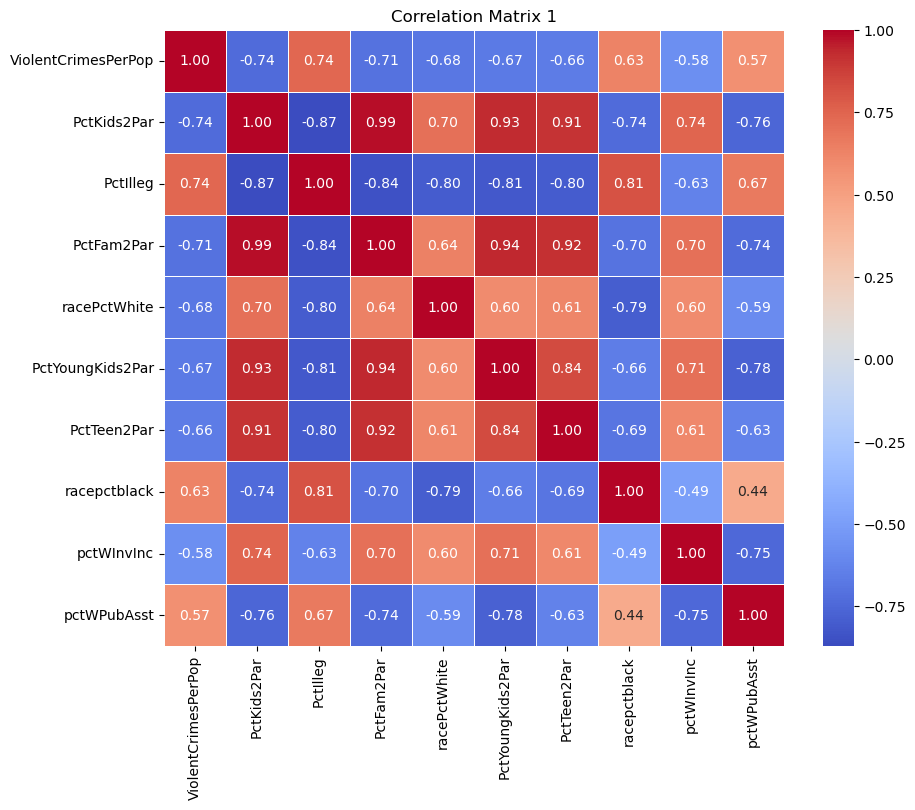

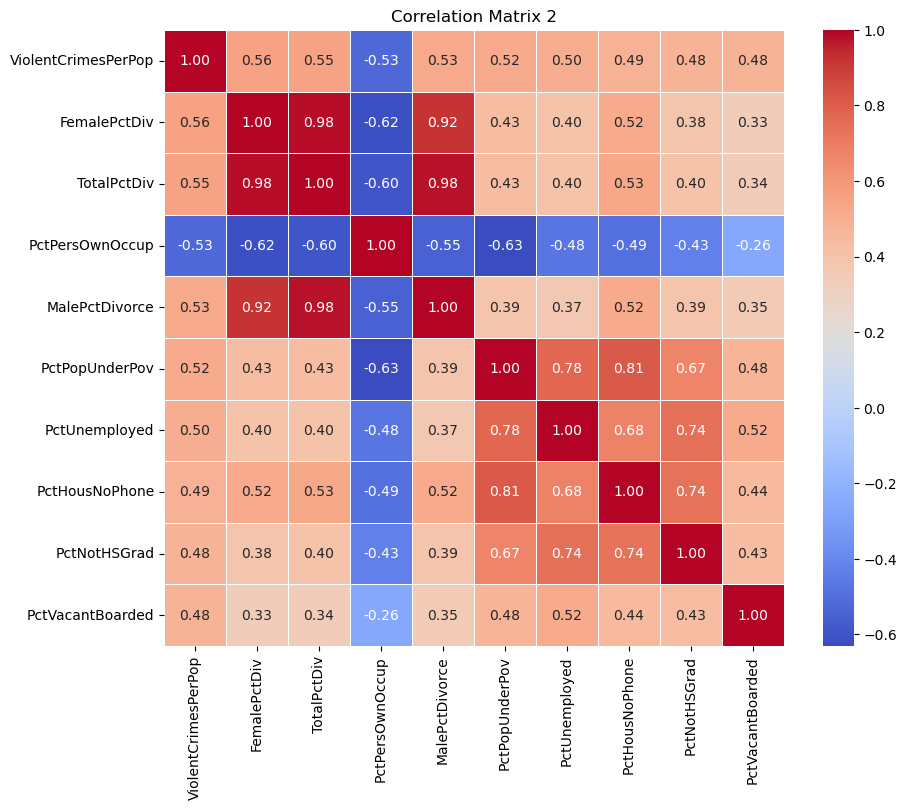

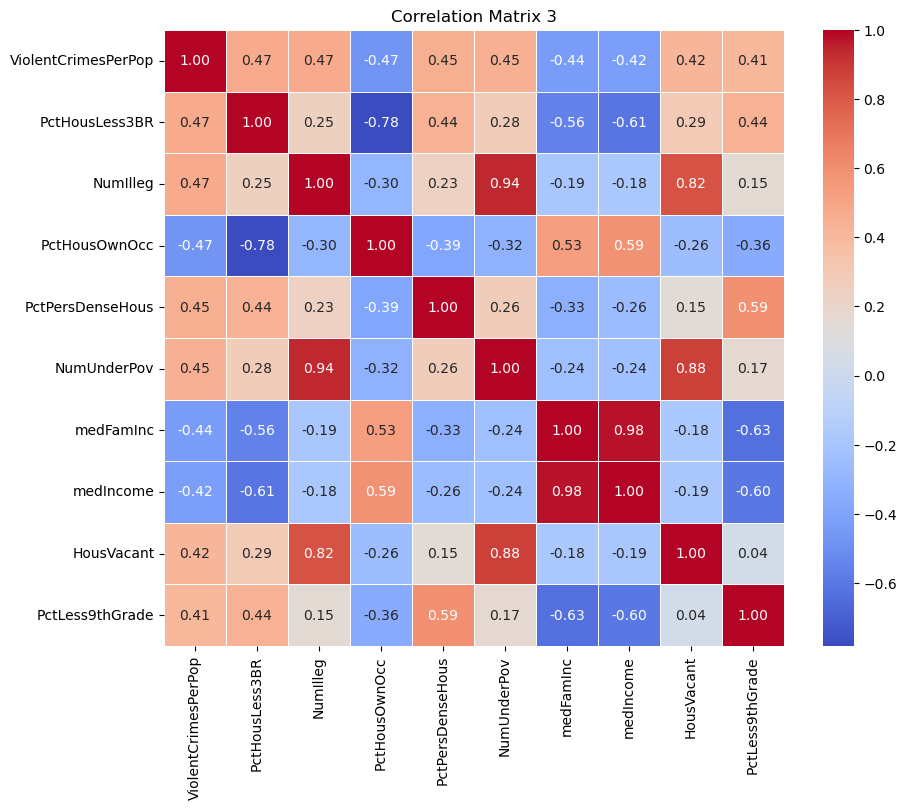

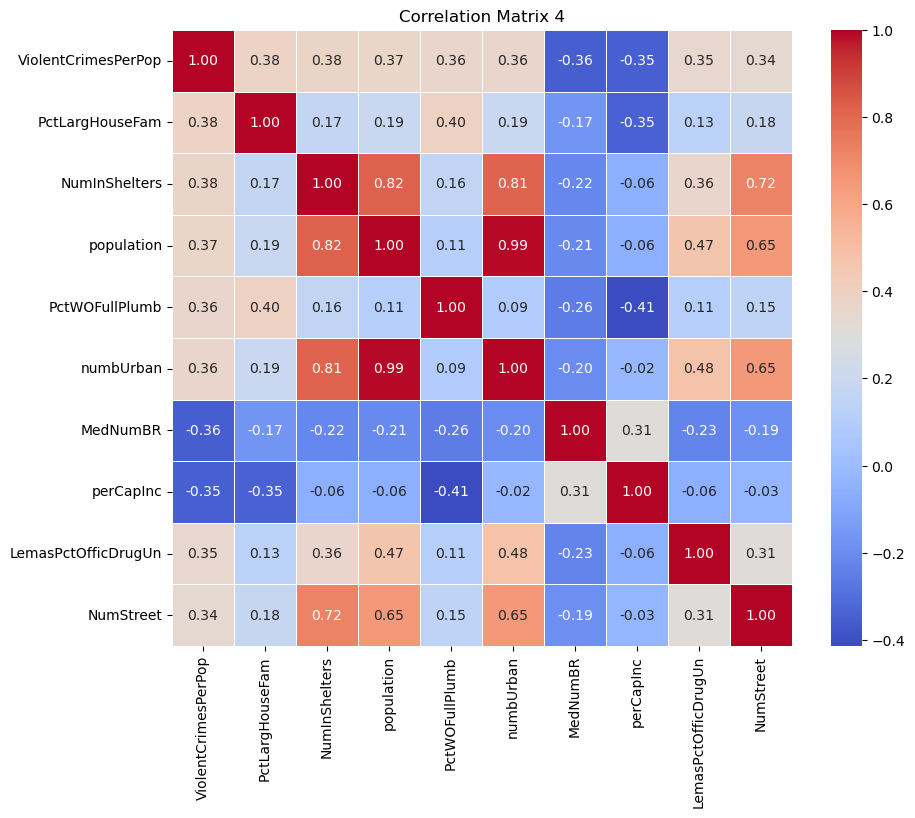

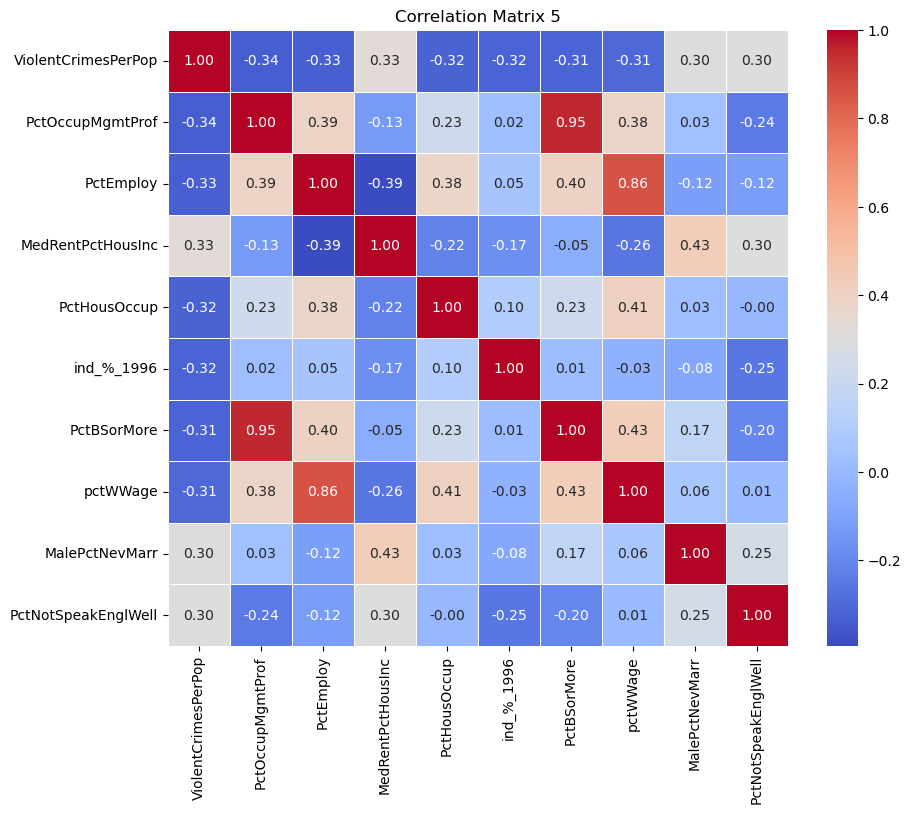

In [88]:
numerical_df = df.select_dtypes(include=[np.number])
correlations = numerical_df.corr()['ViolentCrimesPerPop']

# Subset features with correlation above 0.3 or below -0.3 and order by absolute correlation
selected_features = correlations[(correlations.abs() > 0.3)].abs().sort_values(ascending=False).index.tolist()

# Remove 'ViolentCrimesPerPop' from the list (we'll add it back in each group)
selected_features.remove('ViolentCrimesPerPop')

# Split features into groups of 9 (to make 10 with 'ViolentCrimesPerPop')
feature_groups = [selected_features[i:i+9] for i in range(0, len(selected_features), 9)]

# Create and display correlation matrices using Seaborn heatmap
for idx, group in enumerate(feature_groups):
    features_to_use = ['ViolentCrimesPerPop'] + group
    correlation_matrix = numerical_df[features_to_use].corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title(f'Correlation Matrix {idx + 1}')
    plt.show()

In [89]:
for x in selected_features: print(x)

PctKids2Par
PctIlleg
PctFam2Par
racePctWhite
PctYoungKids2Par
PctTeen2Par
racepctblack
pctWInvInc
pctWPubAsst
FemalePctDiv
TotalPctDiv
PctPersOwnOccup
MalePctDivorce
PctPopUnderPov
PctUnemployed
PctHousNoPhone
PctNotHSGrad
PctVacantBoarded
PctHousLess3BR
NumIlleg
PctHousOwnOcc
PctPersDenseHous
NumUnderPov
medFamInc
medIncome
HousVacant
PctLess9thGrade
PctLargHouseFam
NumInShelters
population
PctWOFullPlumb
numbUrban
MedNumBR
perCapInc
LemasPctOfficDrugUn
NumStreet
PctOccupMgmtProf
PctEmploy
MedRentPctHousInc
PctHousOccup
ind_%_1996
PctBSorMore
pctWWage
MalePctNevMarr
PctNotSpeakEnglWell


- PctKids2Par  Strogest- 
PctIlle     Unusable collinear with PctKids2Parg- 
PctFam2P   Unusable collinear with PctKids2Para- r
racePctWh idk, less violent crime is not an inherent quality of being whitei- te
PctYoungKids  Unusable collinear with PctKids2Par2- Par
PctTee - Unusable collinear with PctKids2Parn- 2Par
racepc - same as racePctWhitet- black
pct - quality of population financial statusW- InvInc
pct - quality of population W- PubAsst
Fem - has potential to be collinear with pctkids2Par (evaluate VIF)a- lePctDiv
T - Unusable collinear with FemalePctDivo- talPctDiv
PctP - Quality of populatione- rsOwnOccup
Ma - Unusable collinear with FemalePctDivl- ePctDivorce
P - Quality of populationc- tPopUnderPov - potential collinear with PctPopUnderPov (evaluate VIF)
- PctUnemployed - Quality of population
- PctHousNoPho - Quality of Populationn- e
PctNotHSGrad - Quality of Population
- PctVacantBoard - Descriptive of communitye- d
PctHo - Pct is relative to population, therefore a better predictoru- sLess3BR
Num - Descriptive of populationI- lleg
PctHousOwn - Descriptive of location/populationO- cc
PctPers - Pct is relative to population, therefore a better predictorD- enseHous - descriptive of population
- NumUnderP - collinear with medFameInc, but less stressors/not best predictoro- v
medFamI - descriptive of population/communityn- c
medIncome
H - descriptive of populationo- usVacant
PctLe - descriptive of family sizes- s9thGrade
Pc - descriptive of population, but inflated by high community pop (?)t- LargHouseF - descriptive of population, but inflated by high community pop (?)a- m
NumInShelte - descriptive of community like phoner- s
popula - descriptive of population, but inflated by high community pop (?)t- ion
Pct - descriptive of locationW- OFullPlum - descriptive of population, potential collinearityb- 
numbUrban
MedNum - tons of missing data (?)B- R
perCap - number of homeless population pct would be betterI- nc
LemasPctOffi - quality of populationc- DrugUn
N - collinear with unemployed and worse predictoru- mStreet
PctOccup - quality of populationM- gmtProf
Pct - quality of locationE- mploy
Med - independents are minority and other predictors are betterR- entPctHousI - potential collinearityn- c
PctHo - quality of populationu- sOccup
ind_%_ - quality of population1- 996
PctBSorMore
p - quality of populationctWWage
MalePctNevMarr
PctNotSpeakEnglWell

In [91]:
variables_of_interest = df[['ViolentCrimesPerPop', 'PctKids2Par', 'pctWInvInc', 'pctWPubAsst', 'FemalePctDiv',
                            'PctPersOwnOccup', 'PctPopUnderPov', 'PctUnemployed', 'PctHousNoPhone', 'PctNotHSGrad',
                            'PctVacantBoarded', 'PctHousLess3BR', 'PctHousOwnOcc', 'PctPersDenseHous',
                            'medFamInc', 'HousVacant', 'PctLargHouseFam', 'NumInShelters', 'population',
                            'PctWOFullPlumb', 'MedNumBR', 'perCapInc', 'NumStreet', 'PctOccupMgmtProf', 'MedRentPctHousInc',
                            'PctHousOccup', 'PctBSorMore', 'pctWWage', 'MalePctNevMarr', 'PctNotSpeakEnglWell',
                            'dem_%_1996', 'rep_%_1996', 'ind_%_1996', 'dem_%_1992', 'rep_%_1992', 'ind_%_1992', 
                            'delta_dem_%', 'delta_rep_%', 'delta_ind_%', 'dem_vs_dem_national_1992', 'dem_vs_dem_national_1996', 'state_flipped_1996']]

original_df_variables_of_interest = df[['ViolentCrimesPerPop', 'PctKids2Par', 'pctWInvInc', 'pctWPubAsst', 'FemalePctDiv',
                            'PctPersOwnOccup', 'PctPopUnderPov', 'PctUnemployed', 'PctHousNoPhone', 'PctNotHSGrad',
                            'PctVacantBoarded', 'PctHousLess3BR', 'PctHousOwnOcc', 'PctPersDenseHous',
                            'medFamInc', 'HousVacant', 'PctLargHouseFam', 'NumInShelters', 'population',
                            'PctWOFullPlumb', 'MedNumBR', 'perCapInc', 'NumStreet', 'PctOccupMgmtProf', 'MedRentPctHousInc',
                            'PctHousOccup', 'PctBSorMore', 'pctWWage', 'MalePctNevMarr', 'PctNotSpeakEnglWell']]

In [92]:
variables_of_interest = pd.get_dummies(variables_of_interest, columns=['state_flipped_1996'], prefix='state_flipped', drop_first=False, dtype=int)

In [93]:
variables_of_interest.head()

,ViolentCrimesPerPop,PctKids2Par,pctWInvInc,pctWPubAsst,FemalePctDiv,PctPersOwnOccup,PctPopUnderPov,PctUnemployed,PctHousNoPhone,PctNotHSGrad,PctVacantBoarded,PctHousLess3BR,PctHousOwnOcc,PctPersDenseHous,medFamInc,HousVacant,PctLargHouseFam,NumInShelters,population,PctWOFullPlumb,MedNumBR,perCapInc,NumStreet,PctOccupMgmtProf,MedRentPctHousInc,PctHousOccup,PctBSorMore,pctWWage,MalePctNevMarr,PctNotSpeakEnglWell,dem_%_1996,rep_%_1996,ind_%_1996,dem_%_1992,rep_%_1992,ind_%_1992,delta_dem_%,delta_rep_%,delta_ind_%,dem_vs_dem_national_1992,dem_vs_dem_national_1996,state_flipped_consistent,state_flipped_dem,state_flipped_rep
0,0.20,0.59,0.60,0.15,0.75,0.55,0.19,0.27,0.14,0.18,0.05,0.51,0.52,0.09,0.39,0.21,0.14,0.04,0.19,0.06,0.5,0.40,0.0,0.52,0.38,0.71,0.48,0.72,0.40,0.06,0.444,0.458,0.066,0.401,0.359,0.233,0.043,0.099,-0.167,-0.029,0.014,0,0,1
1,0.67,0.47,0.45,0.29,0.91,0.26,0.24,0.27,0.16,0.24,0.02,0.82,0.24,0.20,0.29,0.02,0.16,0.00,0.00,0.00,0.0,0.37,0.0,0.36,0.29,0.79,0.30,0.72,0.63,0.10,0.498,0.373,0.089,0.434,0.320,0.237,0.064,0.053,-0.148,0.004,0.068,1,0,0
2,0.43,0.44,0.39,0.40,0.71,0.42,0.27,0.36,0.47,0.43,0.29,0.51,0.41,0.15,0.28,0.01,0.20,0.00,0.00,0.45,0.5,0.27,0.0,0.32,0.48,0.86,0.19,0.58,0.41,0.04,0.543,0.383,0.065,0.498,0.356,0.142,0.045,0.027,-0.077,0.068,0.113,1,0,0
3,0.12,0.54,0.43,0.20,0.49,0.94,0.10,0.33,0.11,0.25,0.60,0.01,0.96,0.12,0.51,0.01,0.56,0.00,0.04,0.11,0.5,0.36,0.0,0.39,0.63,0.97,0.31,0.89,0.45,0.08,0.537,0.359,0.085,0.430,0.406,0.156,0.107,-0.047,-0.071,0.000,0.107,1,0,0
4,0.03,0.91,0.68,0.11,0.20,0.89,0.06,0.12,0.05,0.30,0.04,0.19,0.87,0.02,0.46,0.01,0.16,0.00,0.01,0.14,0.5,0.43,0.0,0.46,0.22,0.89,0.33,0.72,0.27,0.05,0.492,0.400,0.096,0.451,0.361,0.182,0.041,0.039,-0.086,0.021,0.062,1,0,0


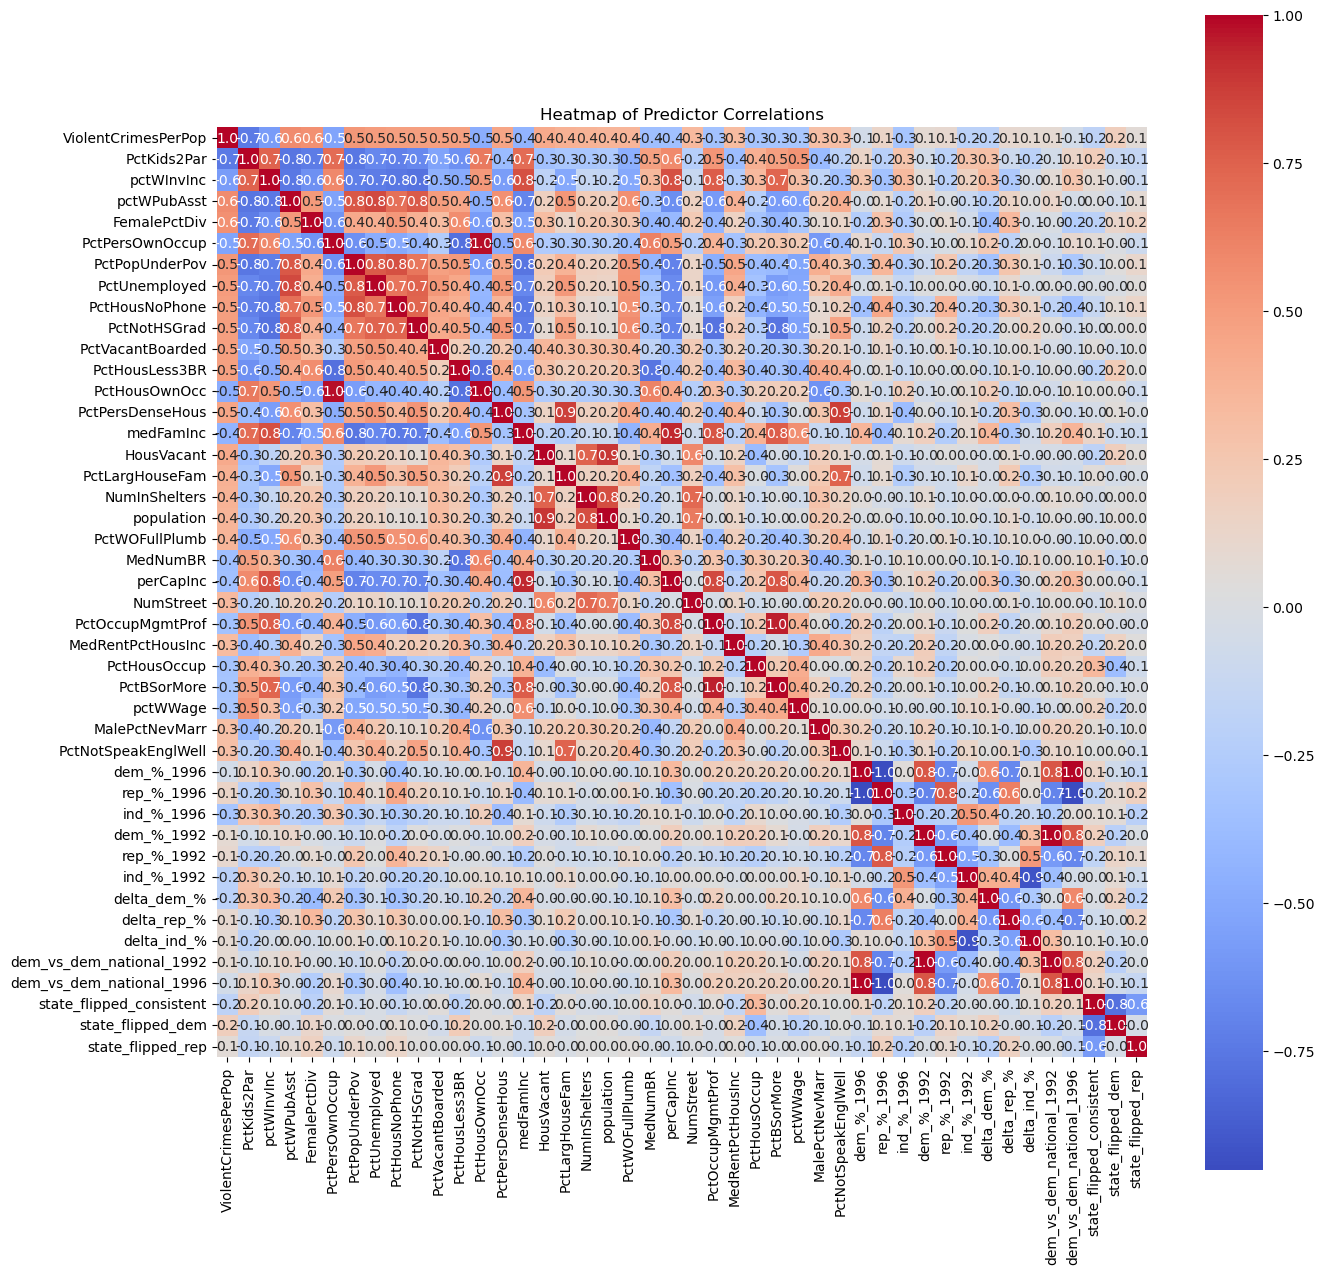

In [94]:
# Compute the correlation matrix
corr = variables_of_interest.corr()

# Generate a heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, fmt=".1f", cmap="coolwarm", square=True)
plt.title('Heatmap of Predictor Correlations')
plt.show()

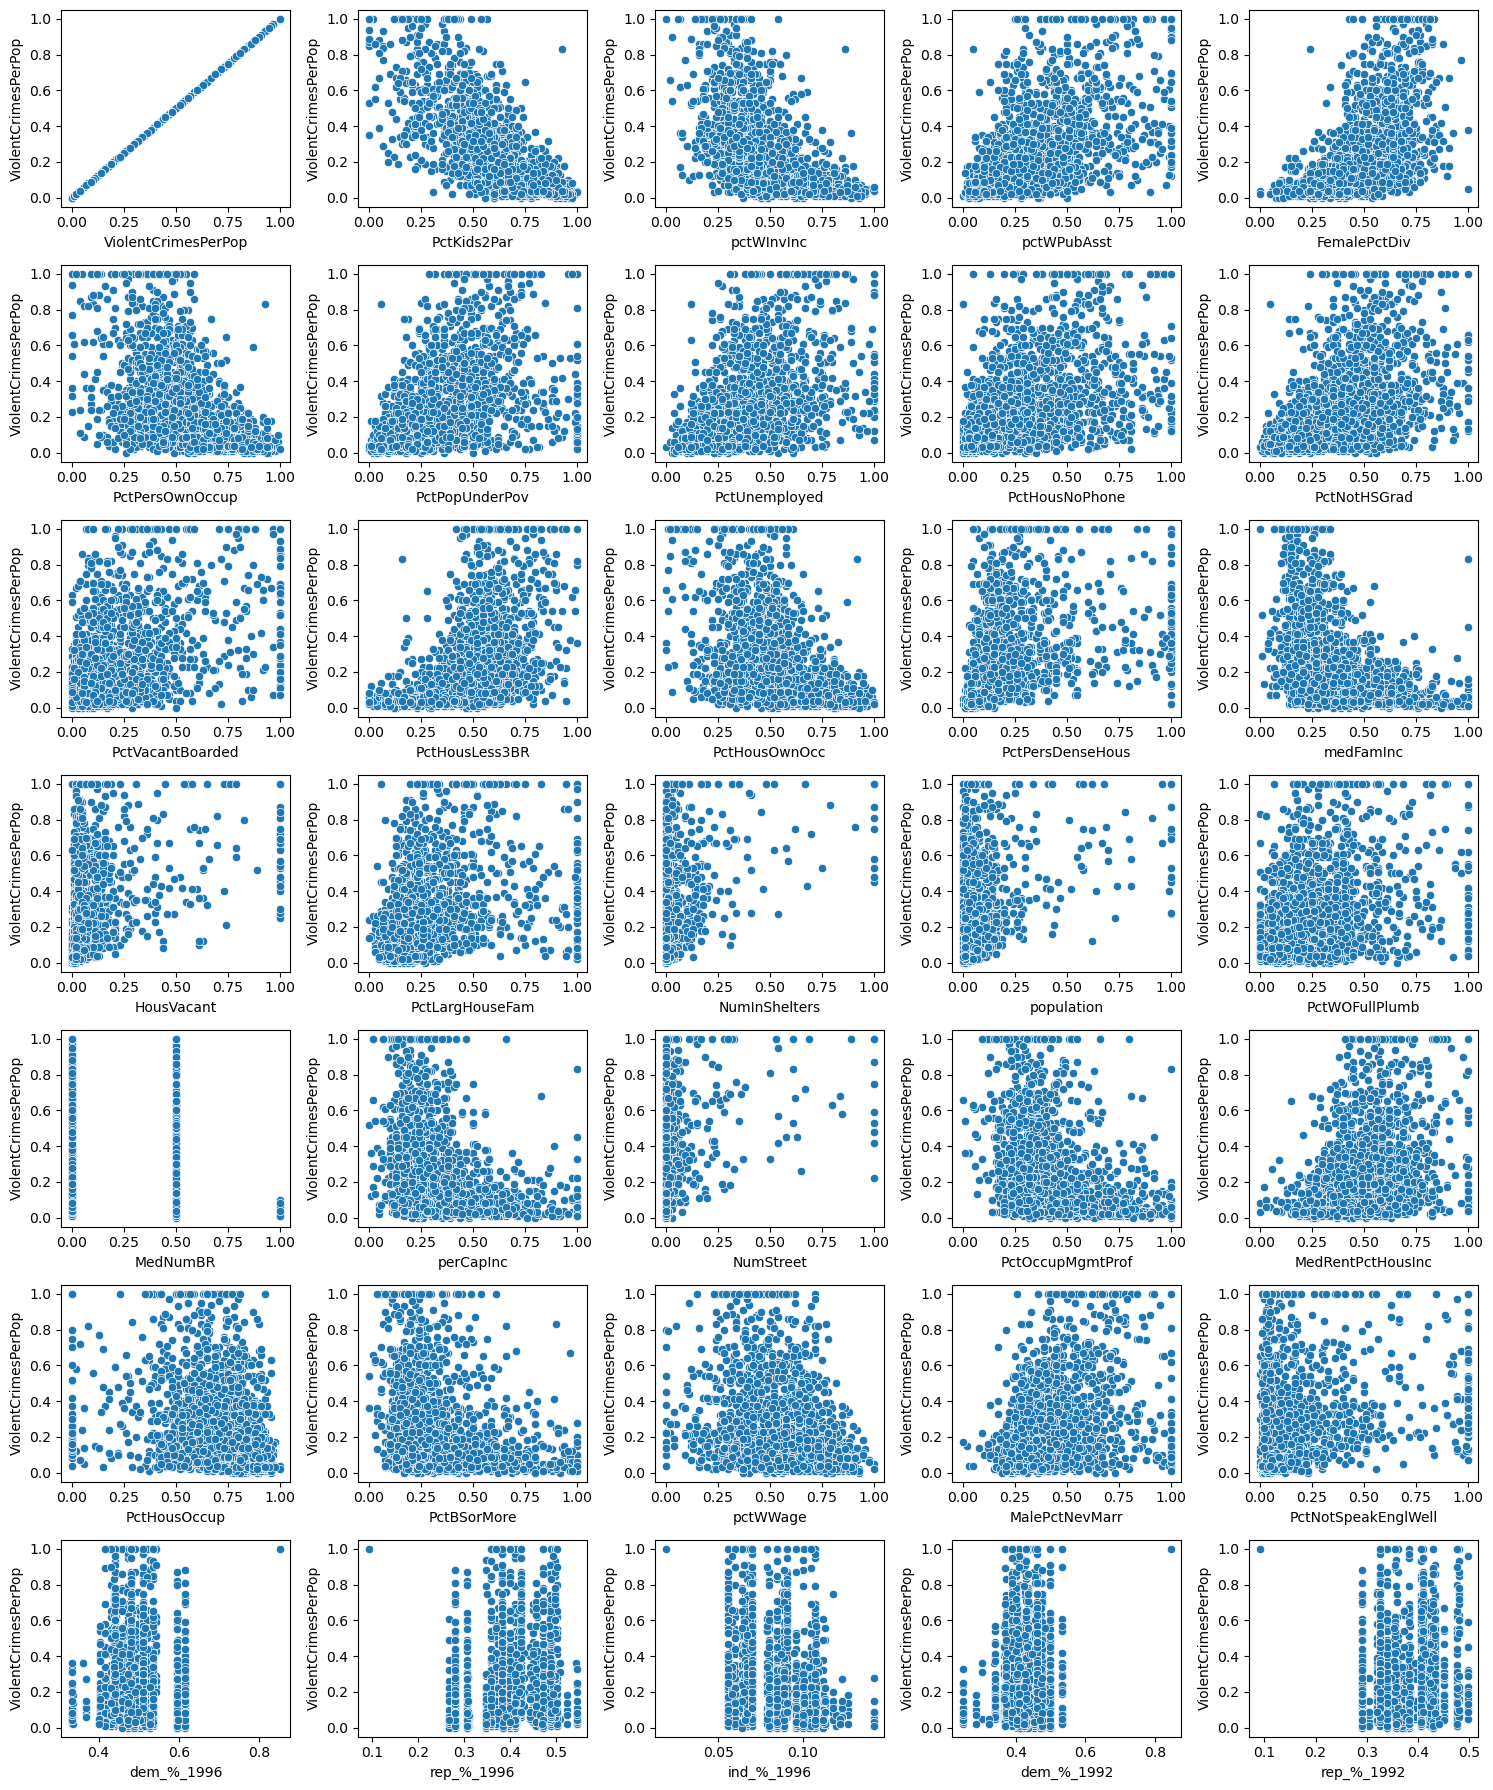

In [95]:
# quick overview of variables plotted against predictive variable violent crime per pop (y-axis)
fig, axes = plt.subplots(7, 5, figsize=(15,18))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(variables_of_interest.columns):
        column = variables_of_interest.columns[i]
        sns.scatterplot(x=variables_of_interest[column], y=variables_of_interest['ViolentCrimesPerPop'], ax=ax)
    else: ax.axis('off')

plt.tight_layout()
plt.show()

In [96]:
X1 = variables_of_interest[['PctKids2Par', 'PctPopUnderPov', 'PctNotHSGrad', 'population']]
y = variables_of_interest['ViolentCrimesPerPop']
X_train1, X_test1, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

#Fitting the Model
lm1 = sm.OLS(y_train, X_train1).fit()
#Print Model Summary
print(lm1.summary())

                                 OLS Regression Results                                 
Dep. Variable:     ViolentCrimesPerPop   R-squared (uncentered):                   0.714
Model:                             OLS   Adj. R-squared (uncentered):              0.713
Method:                  Least Squares   F-statistic:                              991.1
Date:                 Mon, 26 Aug 2024   Prob (F-statistic):                        0.00
Time:                         18:07:20   Log-Likelihood:                          456.19
No. Observations:                 1595   AIC:                                     -904.4
Df Residuals:                     1591   BIC:                                     -882.9
Df Model:                            4                                                  
Covariance Type:             nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [97]:
X1 = variables_of_interest[['PctKids2Par', 'PctPopUnderPov', 'PctNotHSGrad', 'population', 'state_flipped_dem']]
y = variables_of_interest['ViolentCrimesPerPop']
X_train1, X_test1, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

#Fitting the Model
lm1 = sm.OLS(y_train, X_train1).fit()
#Print Model Summary
print(lm1.summary())

                                 OLS Regression Results                                 
Dep. Variable:     ViolentCrimesPerPop   R-squared (uncentered):                   0.728
Model:                             OLS   Adj. R-squared (uncentered):              0.727
Method:                  Least Squares   F-statistic:                              850.5
Date:                 Mon, 26 Aug 2024   Prob (F-statistic):                        0.00
Time:                         18:07:20   Log-Likelihood:                          496.89
No. Observations:                 1595   AIC:                                     -983.8
Df Residuals:                     1590   BIC:                                     -956.9
Df Model:                            5                                                  
Covariance Type:             nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------

In [98]:
# VIF scores for all the predictors
VIFs = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
for i, vif in enumerate(VIFs):
    print(f"VIF for {X1.columns[i]}: {vif}")

VIF for PctKids2Par: 2.279465893689467
VIF for PctPopUnderPov: 5.292525894080172
VIF for PctNotHSGrad: 7.045786230259824
VIF for population: 1.223780292240876
VIF for state_flipped_dem: 1.0538000186179426


In [99]:
# VIF scores for all the predictors
VIFs = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
for i, vif in enumerate(VIFs):
    print(f"VIF for {X1.columns[i]}: {vif}")

VIF for PctKids2Par: 2.279465893689467
VIF for PctPopUnderPov: 5.292525894080172
VIF for PctNotHSGrad: 7.045786230259824
VIF for population: 1.223780292240876
VIF for state_flipped_dem: 1.0538000186179426


In [100]:
X = original_df_variables_of_interest.drop(columns='ViolentCrimesPerPop', axis=1)
y = original_df_variables_of_interest['ViolentCrimesPerPop']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Fitting the Model
lm2 = sm.OLS(y_train, X_train).fit()
#Print Model Summary
print(lm2.summary())

                                 OLS Regression Results                                 
Dep. Variable:     ViolentCrimesPerPop   R-squared (uncentered):                   0.823
Model:                             OLS   Adj. R-squared (uncentered):              0.820
Method:                  Least Squares   F-statistic:                              251.9
Date:                 Mon, 26 Aug 2024   Prob (F-statistic):                        0.00
Time:                         18:07:20   Log-Likelihood:                          842.15
No. Observations:                 1595   AIC:                                     -1626.
Df Residuals:                     1566   BIC:                                     -1470.
Df Model:                           29                                                  
Covariance Type:             nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------

In [101]:
# Calculate the correlation matrix
correlation_matrix = variables_of_interest.corr()

# Extract the correlation values with 'PctKids2Par'
correlations_with_pct_kids_2_par = correlation_matrix['PctKids2Par'].drop(labels='PctKids2Par')

# Find the 5 variables with the least absolute correlation
least_correlated_variables = correlations_with_pct_kids_2_par.abs().nsmallest(5)

# Display the results
print("5 variables with the least correlation to 'PctKids2Par':")
for var, value in least_correlated_variables.items():
    print(f"Variable: {var}, Correlation: {value:.4f}")

5 variables with the least correlation to 'PctKids2Par':
Variable: dem_%_1992, Correlation: 0.0581
Variable: dem_vs_dem_national_1992, Correlation: 0.0581
Variable: delta_rep_%, Correlation: 0.0938
Variable: state_flipped_dem, Correlation: 0.1308
Variable: dem_%_1996, Correlation: 0.1340


In [102]:
df['cities'] = df['communityname'].str.lower().str.replace(r'(city|town|village|township)$', '', regex=True)
df[['communityname', 'cities']].head(5)

,communityname,cities
0,Lakewoodcity,lakewood
1,Tukwilacity,tukwila
2,Aberdeentown,aberdeen
3,Willingborotownship,willingboro
4,Bethlehemtownship,bethlehem


with pdfplumber.open('city_names.pdf') as pdf:
    with open('output1.csv', 'w', newline='') as csvfile:
        csvwriter = csv.writer(csvfile)
        csvwriter.writerow(['State Name', 'State Code', 'City Code', 'City Name', 'County Code', 'County Name'])

        for i, page in enumerate(pdf.pages):
            table = page.extract_table()
            if table:
                for row in table:
                    csvwriter.writerow(row)

In [104]:
city_names = pd.read_csv('output1.csv')

In [105]:
city_names.head()

,State Name,State Code,City Code,City Name,County Code,County Name
0,State Name,State\nCode,City\nCode,City Name,County\nCode,County Name
1,ALABAMA,01,00124,ABBEVILLE,067,HENRY
2,ALABAMA,01,00820,ALABASTER,117,SHELBY
3,ALABAMA,01,00988,ALBERTVILLE,095,MARSHALL
4,ALABAMA,01,01132,ALEXANDER CITY,123,TALLAPOOSA


In [106]:
city_names['City Name'] =  city_names['City Name'].str.lower().str.replace(' ', '')
city_names.head(5)

,State Name,State Code,City Code,City Name,County Code,County Name
0,State Name,State\nCode,City\nCode,cityname,County\nCode,County Name
1,ALABAMA,01,00124,abbeville,067,HENRY
2,ALABAMA,01,00820,alabaster,117,SHELBY
3,ALABAMA,01,00988,albertville,095,MARSHALL
4,ALABAMA,01,01132,alexandercity,123,TALLAPOOSA


In [107]:
city_names['State Code'] = pd.to_numeric(city_names['State Code'], errors='coerce')

# Drop the rows with NaN values (which were non-numeric)
city_names = city_names.dropna(subset=['State Code'])

# Convert the column to int64
city_names['State Code'] = city_names['State Code'].astype('int64')

In [108]:
city_names.dtypes

State Name     object
State Code      int64
City Code      object
City Name      object
County Code    object
County Name    object
dtype: object

In [109]:
df = pd.merge(df, city_names[['State Code', 'City Name', 'City Code', 'County Code', 'County Name']], left_on=['state', 'cities'], right_on=['State Code', 'City Name'], how='left')
df.head(50)

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop,state_1992,total_votes_1992,dem_votes_1992,dem_%_1992,dem_ev_1992,rep_votes_1992,rep_%_1992,rep_ev_1992,ind_votes_1992,ind_%_1992,ind_ev_1992,state_abbv_1992,state_code,Unnamed: 3_1992,Unnamed: 4_1992,Unnamed: 5_1992,state_1996,total_votes_1996,dem_votes_1996,dem_%_1996,dem_ev_1996,rep_votes_1996,rep_%_1996,rep_ev_1996,ind_votes_1996,ind_%_1996,ind_ev_1996,state_abbv_1996,Unnamed: 3_1996,Unnamed: 4_1996,Unnamed: 5_1996,delta_total_votes,delta_dem_votes,delta_rep_votes,delta_ind_votes,delta_dem_%,delta_rep_%,delta_ind_%,state_flipped_1996,dem_vs_dem_national_1992,dem_vs_dem_national_1996,cities,State Code,City Name,City Code,County Code,County Name
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.00,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,0.41,0.25,0.52,0.68,0.40,0.75,0.75,0.35,0.55,0.59,0.61,0.56,0.74,0.76,0.04,0.14,0.03,0.24,0.27,0.37,0.39,0.07,0.07,0.08,0.08,0.89,0.06,0.14,0.13,0.33,0.39,0.28,0.55,0.09,0.51,0.5,0.21,0.71,0.52,0.05,0.26,0.65,0.14,0.06,0.22,0.19,0.18,0.36,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.00,0.12,0.42,0.50,0.51,0.64,0.03,0.13,0.96,0.17,0.06,0.18,0.44,0.13,0.94,0.93,0.03,0.07,0.1,0.07,0.02,0.57,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20,Colorado,1569180,629681,0.401,8.0,562850,0.359,0.0,366010,0.233,0.0,CO,8,NaN,NaN,NaN,Colorado,1510704,671152,0.444,0.0,691848,0.458,8.0,99629,0.066,0.0,CO,NaN,NaN,NaN,-58476,41471,128998,-266381,0.043,0.099,-0.167,rep,-0.029,0.014,lakewood,8.0,lakewood,43000,059,JEFFERSON
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.00,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,0.42,0.36,1.00,0.63,0.91,1.00,0.29,0.43,0.47,0.60,0.39,0.46,0.53,0.00,0.24,0.01,0.52,0.62,0.64,0.63,0.25,0.27,0.25,0.23,0.84,0.10,0.16,0.10,0.17,0.29,0.17,0.26,0.20,0.82,0.0,0.02,0.79,0.24,0.02,0.25,0.65,0.16,0.00,0.21,0.20,0.21,0.42,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.00,0.21,0.50,0.34,0.60,0.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67,Washington,2288230,993037,0.434,11.0,731234,0.320,0.0,541780,0.237

In [110]:
# null value counts per variable
df_nulls = df.isna().sum().to_string()
print(df_nulls)

state                          0
county                      1270
community                   1273
communityname                  0
fold                           0
population                     0
householdsize                  0
racepctblack                   0
racePctWhite                   0
racePctAsian                   0
racePctHisp                    0
agePct12t21                    0
agePct12t29                    0
agePct16t24                    0
agePct65up                     0
numbUrban                      0
pctUrban                       0
medIncome                      0
pctWWage                       0
pctWFarmSelf                   0
pctWInvInc                     0
pctWSocSec                     0
pctWPubAsst                    0
pctWRetire                     0
medFamInc                      0
perCapInc                      0
whitePerCap                    0
blackPerCap                    0
indianPerCap                   0
AsianPerCap                    0
OtherPerCa

In [162]:
df[['communityname', 'state', 'State Code', 'City Name', 'County Code', 'County Name']].head(100)

,communityname,state,State Code,City Name,County Code,County Name
0,Lakewoodcity,8,8.0,lakewood,059,JEFFERSON
1,Tukwilacity,53,53.0,tukwila,033,KING
2,Aberdeentown,24,24.0,aberdeen,025,HARFORD
3,Willingborotownship,34,34.0,willingboro,005,BURLINGTON
4,Bethlehemtownship,42,42.0,bethlehem,077,LEHIGH
5,Bethlehemtownship,42,42.0,bethlehem,095,NORTHAMPTON
6,SouthPasadenacity,6,6.0,southpasadena,037,LOS ANGELES
7,Lincolntown,44,44.0,lincoln,007,PROVIDENCE
8,Selmacity,6,6.0,selma,019,FRESNO
9,Hendersoncity,21,21.0,henderson,101,HENDERSON
